<a href="https://colab.research.google.com/github/ismael094/EscenariosCNN/blob/master/EscenariosCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
from PIL import ImageFile
from keras.utils import plot_model
ImageFile.LOAD_TRUNCATED_IMAGES = True

#Visualización de imágenes

###Playa

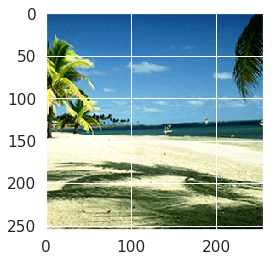

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Scenes/train/0/bea5.jpg', 'r')
imshow(np.asarray(pil_im))

###Bosques

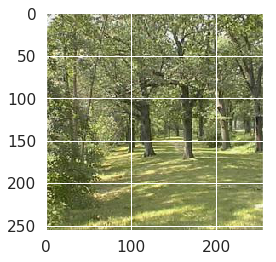

In [0]:
%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Scenes/train/1/bost102.jpg', 'r')
imshow(np.asarray(pil_im))

###Montaña

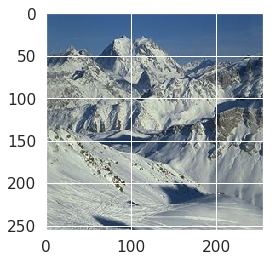

In [0]:
%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Scenes/train/2/land210.jpg', 'r')
imshow(np.asarray(pil_im))

###Rascacielos

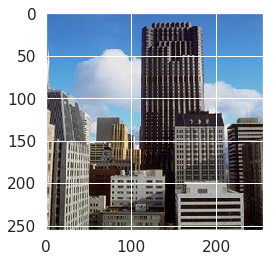

In [0]:
%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Scenes/train/3/a487065.jpg', 'r')
imshow(np.asarray(pil_im))

## Imágenes de entrenamiento y validación

In [0]:
batch_size = 32

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Scenes/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Scenes/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')

## Primer modelo:

Capas: CNN_32, POL, CNN_64, POL, CNN_32, POL, FC_64 ,FC_4

Función de activación: ReLU
Épocas: 10

In [0]:
# MODEL --------------------------------------------------

  
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])

In [0]:
 history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1,
      shuffle=True
)

Epoch 1/10
100/100 [==============================] - 42s 422ms/step - loss: 1.1118 - acc: 0.4743 - val_loss: 0.8468 - val_acc: 0.6736
Epoch 2/10
100/100 [==============================] - 40s 398ms/step - loss: 0.8347 - acc: 0.6467 - val_loss: 0.6678 - val_acc: 0.7578
Epoch 3/10
100/100 [==============================] - 39s 385ms/step - loss: 0.6909 - acc: 0.7146 - val_loss: 0.4829 - val_acc: 0.8322
Epoch 4/10
100/100 [==============================] - 39s 394ms/step - loss: 0.5468 - acc: 0.7908 - val_loss: 0.3496 - val_acc: 0.8839
Epoch 5/10
100/100 [==============================] - 39s 389ms/step - loss: 0.4714 - acc: 0.8207 - val_loss: 0.2954 - val_acc: 0.8959
Epoch 6/10
100/100 [==============================] - 39s 390ms/step - loss: 0.4027 - acc: 0.8546 - val_loss: 0.4380 - val_acc: 0.8540
Epoch 7/10
100/100 [==============================] - 39s 391ms/step - loss: 0.3744 - acc: 0.8615 - val_loss: 0.3113 - val_acc: 0.8884
Epoch 8/10
100/100 [==============================] - 4

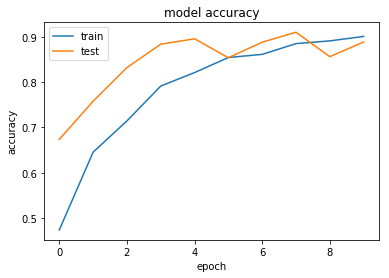

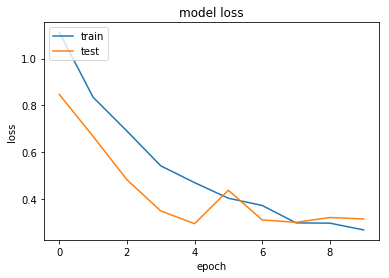

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Segundo modelo:

Capas: CNN_64, POL, CNN_128, POL, CNN_64, POL, FC_128 ,FC_4

Función de activación: ReLU
Épocas: 10

In [0]:
# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1,
      shuffle=True
)


Epoch 1/10
100/100 [==============================] - 43s 428ms/step - loss: 1.0839 - acc: 0.4905 - val_loss: 0.7064 - val_acc: 0.7102
Epoch 2/10
100/100 [==============================] - 41s 405ms/step - loss: 0.6445 - acc: 0.7424 - val_loss: 0.5160 - val_acc: 0.8042
Epoch 3/10
100/100 [==============================] - 41s 408ms/step - loss: 0.4847 - acc: 0.8104 - val_loss: 0.4271 - val_acc: 0.8355
Epoch 4/10
100/100 [==============================] - 41s 413ms/step - loss: 0.3860 - acc: 0.8541 - val_loss: 0.2521 - val_acc: 0.9050
Epoch 5/10
100/100 [==============================] - 39s 392ms/step - loss: 0.3669 - acc: 0.8651 - val_loss: 0.4731 - val_acc: 0.8066
Epoch 6/10
100/100 [==============================] - 41s 406ms/step - loss: 0.2880 - acc: 0.9003 - val_loss: 0.2915 - val_acc: 0.9156
Epoch 7/10
100/100 [==============================] - 39s 393ms/step - loss: 0.2350 - acc: 0.9136 - val_loss: 0.2395 - val_acc: 0.9065
Epoch 8/10
100/100 [==============================] - 4

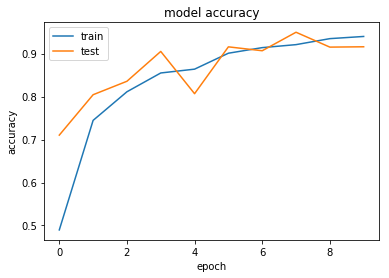

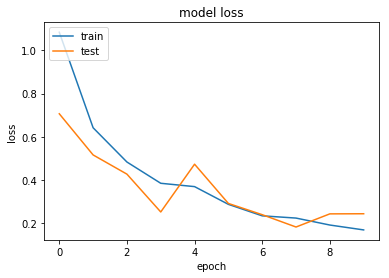

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Predicción con imágenes nuevas

['Playa', 'Bosque', 'Montaña', 'Rascacielos']
[[0. 1. 0. 0.]]


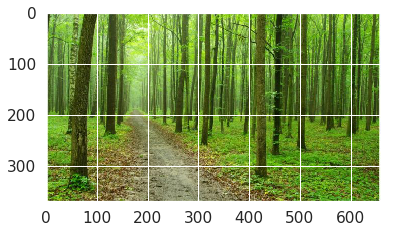

In [0]:
from keras.preprocessing import image
import numpy as np
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/images/_101542074_gettyimages-956391468.jpg', 'r')
imshow(np.asarray(pil_im))

test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/images/_101542074_gettyimages-956391468.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(['Playa','Bosque','Montaña','Rascacielos'])
print(result)

['Playa', 'Bosque', 'Montaña', 'Rascacielos']
[[1. 0. 0. 0.]]


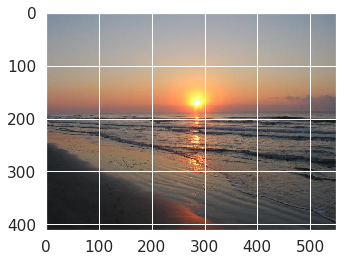

In [0]:
%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/images/sunrise-on-forrest-beach.jpg', 'r')
imshow(np.asarray(pil_im))

test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/images/sunrise-on-forrest-beach.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(['Playa','Bosque','Montaña','Rascacielos'])
print(result)